In [ ]:
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

train_path = '/content/drive/MyDrive/Colab Notebooks/ISIC/data/train'
test_path = '/content/drive/MyDrive/Colab Notebooks/ISIC/data/test'

Mounted at /content/drive


In [ ]:
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

In [ ]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_set = train_datagen.flow_from_directory(
    train_path, target_size=IMAGE_SIZE, batch_size=BATCH_SIZE, class_mode='binary'
)
test_set = test_datagen.flow_from_directory(
    test_path, target_size=IMAGE_SIZE, batch_size=BATCH_SIZE, class_mode='binary'
)

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


In [ ]:
base_model = VGG19(input_shape=(224, 224, 3), weights='imagenet', include_top=False)
for layer in base_model.layers:
    layer.trainable = False

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='sigmoid')(x)

model1 = Model(inputs=base_model.input, outputs=x)

In [ ]:
print("Model 1 Summary (Feature Extraction):")
model1.summary()

Model 1 Summary (Feature Extraction):


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 32,870,465 (125.39 MB)

 Trainable params: 12,846,081 (49.00 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, AUC

model1.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy', Precision(), Recall(), AUC()])

In [ ]:
from datetime import datetime
from tensorflow.keras.callbacks import ModelCheckpoint



checkpoint = ModelCheckpoint(filepath='mymodel.keras', verbose=2, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

In [ ]:
history1 = model1.fit(
   train_set, epochs=10, steps_per_epoch=5, validation_data=test_set, validation_steps=4, callbacks=callbacks ,verbose=2
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



Epoch 1: val_loss improved from inf to 7.57637, saving model to mymodel.keras
5/5 - 267s - 53s/step - accuracy: 0.7500 - auc: 0.7907 - loss: 6.0021 - precision: 0.7531 - recall: 0.7531 - val_accuracy: 0.7734 - val_auc: 0.7910 - val_loss: 7.5764 - val_precision: 0.8542 - val_recall: 0.6508
Epoch 2/10

Epoch 2: val_loss did not improve from 7.57637
5/5 - 208s - 42s/step - accuracy: 0.7125 - auc: 0.7201 - loss: 10.6316 - precision: 0.6338 - recall: 0.6923 - val_accuracy: 0.7734 - val_auc: 0.7684 - val_loss: 7.8061 - val_precision: 0.7237 - val_recall: 0.8730
Epoch 3/10

Epoch 3: val_loss improved from 7.57637 to 3.76826, saving model to mymodel.keras
5/5 - 211s - 42s/step - accuracy: 0.7063 - auc: 0.7226 - loss: 8.2089 - precision: 0.6724 - recall: 0.5821 - val_accuracy: 0.8359 - val_auc: 0.8551 - val_loss: 3.7683 - val_precision: 0.8095 - val_recall: 0.8500
Epoch 4/10

Epoch 4: val_loss did not improve from 3.76826
5/5 - 206s - 41s/step - accuracy: 0.7625 - auc: 0.7830 - loss: 8.0944 - 

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 7: val_loss did not improve from 3.76826
5/5 - 206s - 41s/step - accuracy: 0.7812 - auc: 0.8231 - loss: 5.7035 - precision: 0.7656 - recall: 0.7101 - val_accuracy: 0.7734 - val_auc: 0.7957 - val_loss: 4.2369 - val_precision: 0.8043 - val_recall: 0.6491
Epoch 8/10

Epoch 8: val_loss did not improve from 3.76826
5/5 - 203s - 41s/step - accuracy: 0.7937 - auc: 0.8098 - loss: 5.2229 - precision: 0.7377 - recall: 0.7258 - val_accuracy: 0.7656 - val_auc: 0.8051 - val_loss: 4.3854 - val_precision: 0.6933 - val_recall: 0.8814
Epoch 9/10

Epoch 9: val_loss improved from 3.76826 to 2.90843, saving model to mymodel.keras
5/5 - 207s - 41s/step - accuracy: 0.7937 - auc: 0.8159 - loss: 4.6215 - precision: 0.8077 - recall: 0.7778 - val_accuracy: 0.8047 - val_auc: 0.8244 - val_loss: 2.9084 - val_precision: 0.8136 - val_recall: 0.7742
Epoch 10/10

Epoch 10: val_loss did not improve from 2.90843
5/5 - 202s - 40s/step - accuracy: 0.7688 - auc: 0.7876 - loss: 4.2245 - precision: 0.7778 - recall: 0.

## Model 2

In [ ]:
base_model = VGG19(input_shape=(224, 224, 3), weights='imagenet', include_top=False)
for layer in base_model.layers[:-5]:
    layer.trainable = False
for layer in base_model.layers[-5:]:
    layer.trainable = True

In [ ]:
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='sigmoid')(x)

model2 = Model(inputs=base_model.input, outputs=x)

In [ ]:
model2.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',Precision(), Recall(), AUC()])

In [ ]:
# Display model summary for Model 2
print("Model 2 Summary (Fine-Tuning):")
model2.summary()

Model 2 Summary (Fine-Tuning):


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 32,935,745 (125.64 MB)

 Trainable params: 22,350,593 (85.26 MB)

 Non-trainable params: 10,585,152 (40.38 MB)

In [ ]:
from datetime import datetime
from tensorflow.keras.callbacks import ModelCheckpoint



checkpoint = ModelCheckpoint(filepath='mymodel.keras', verbose=2, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

In [ ]:
history2 = model2.fit(
    train_set, epochs=10, steps_per_epoch=5, validation_data=test_set, validation_steps=4, callbacks=callbacks ,verbose=2
)

Epoch 1/10

Epoch 1: val_loss improved from inf to 0.95417, saving model to mymodel.keras
5/5 - 263s - 53s/step - accuracy: 0.5125 - auc_1: 0.5016 - loss: 3.7040 - precision_1: 0.4875 - recall_1: 0.5132 - val_accuracy: 0.6016 - val_auc_1: 0.6780 - val_loss: 0.9542 - val_precision_1: 0.5357 - val_recall_1: 0.7895
Epoch 2/10

Epoch 2: val_loss did not improve from 0.95417
5/5 - 232s - 46s/step - accuracy: 0.5375 - auc_1: 0.5493 - loss: 14.5768 - precision_1: 0.5263 - recall_1: 0.5128 - val_accuracy: 0.5781 - val_auc_1: 0.6745 - val_loss: 1.9312 - val_precision_1: 0.5781 - val_recall_1: 1.0000
Epoch 3/10

Epoch 3: val_loss improved from 0.95417 to 0.68709, saving model to mymodel.keras
5/5 - 233s - 47s/step - accuracy: 0.4938 - auc_1: 0.4830 - loss: 1.3578 - precision_1: 0.4848 - recall_1: 0.6154 - val_accuracy: 0.5625 - val_auc_1: 0.6225 - val_loss: 0.6871 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 4/10

Epoch 4: val_loss did not improve from 0.68709
5/5 - 231s - 46s/

In [ ]:
model1.save('/content/drive/MyDrive/Colab Notebooks/Homework4/model1_H1_first.keras')
model2.save('/content/drive/MyDrive/Colab Notebooks/Homework4/model2_H1_first.keras')

import json
from tensorflow.keras.models import load_model

# Save training histories to JSON files
with open('/content/drive/MyDrive/Colab Notebooks/Homework4/first_history1.json', 'w') as f:
    json.dump(history1.history, f)

with open('/content/drive/MyDrive/Colab Notebooks/Homework4/first_history2.json', 'w') as f:
    json.dump(history2.history, f)

# Function to load model and history
def load_model_and_history(model_path, history_path):
    model = load_model(model_path)
    with open(history_path, 'r') as f:
        history = json.load(f)
    return model, history

# # Load models and histories
# model1, history1_data = load_model_and_history(
#     '/content/drive/MyDrive/Colab Notebooks/Homework4/model1_H1_first.keras',
#     '/content/drive/MyDrive/Colab Notebooks/Homework4/first_history1.json'
# )
# model2, history2_data = load_model_and_history(
#     '/content/drive/MyDrive/Colab Notebooks/Homework4/model2_H1_first.keras',
#     '/content/drive/MyDrive/Colab Notebooks/Homework4/first_history2.json'
# )

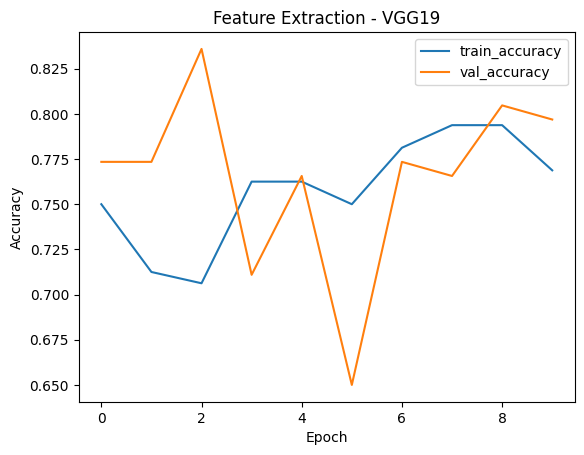

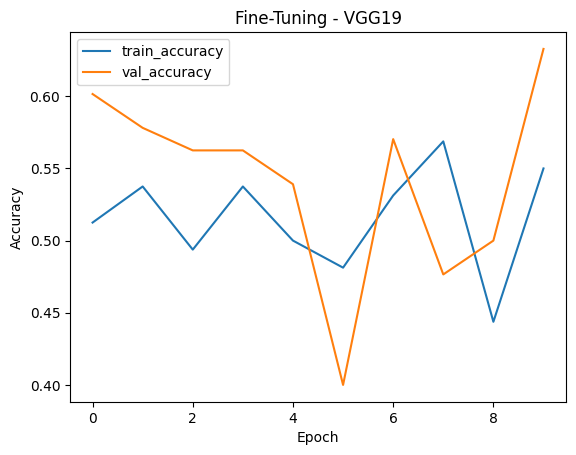

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history, title):
    plt.plot(history.history['accuracy'], label='train_accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(title)
    plt.legend()
    plt.show()

plot_history(history1, "Feature Extraction - VGG19")

plot_history(history2, "Fine-Tuning - VGG19")

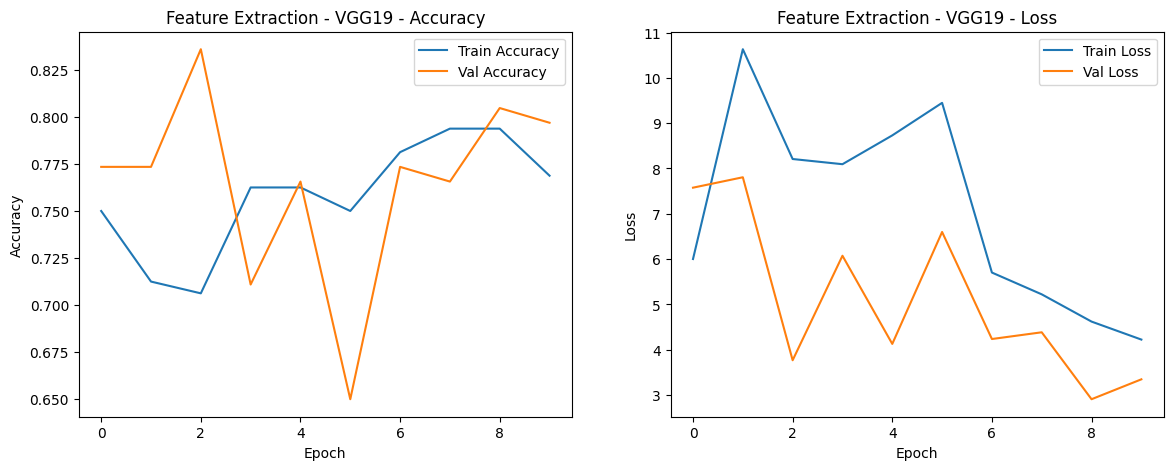

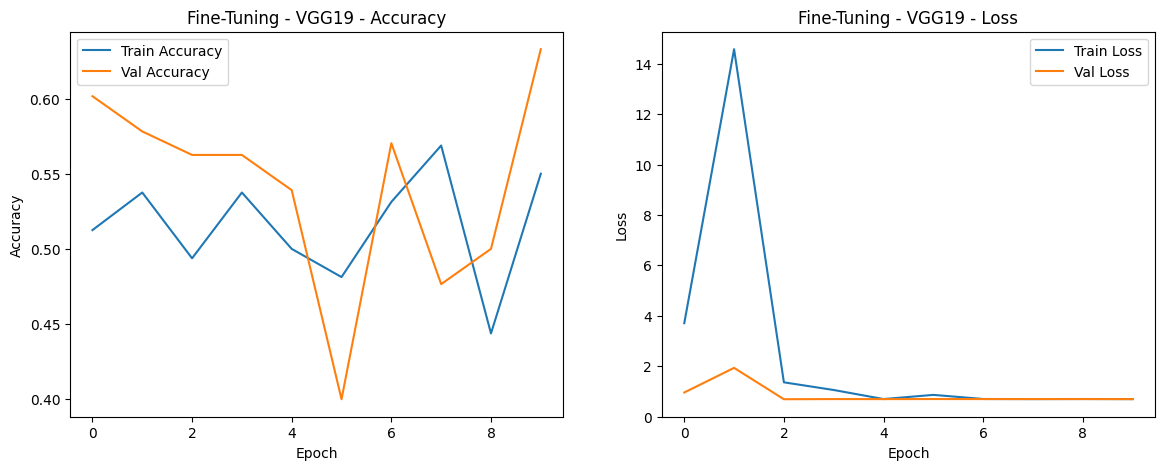

Hyperparameters Table
                Model  Layers  Batch Size Optimizer  Learning Rate  \
0  Feature Extraction      26          32      Adam          0.001   
1         Fine-Tuning      28          32      Adam          0.001   

   Dropout Rate  Final Dense Units Activation (Output)  
0           0.5                  1             sigmoid  
1           0.5                  1             sigmoid  
Final Train and Validation Metrics Comparison Table
                Model  Train Accuracy  Val Accuracy  Train Loss  Val Loss
0  Feature Extraction         0.79375      0.835938    4.224495  2.908426
1         Fine-Tuning         0.56875      0.632812    0.692211  0.687092


In [ ]:
import pandas as pd

def plot_metrics(history, title):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    ax1.plot(history.history['accuracy'], label='Train Accuracy')
    ax1.plot(history.history['val_accuracy'], label='Val Accuracy')
    ax1.set_title(f'{title} - Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()

    ax2.plot(history.history['loss'], label='Train Loss')
    ax2.plot(history.history['val_loss'], label='Val Loss')
    ax2.set_title(f'{title} - Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    plt.show()

plot_metrics(history1, "Feature Extraction - VGG19")

plot_metrics(history2, "Fine-Tuning - VGG19")

hyperparams = pd.DataFrame({
    "Model": ["Feature Extraction", "Fine-Tuning"],
    "Layers": [len(model1.layers), len(model2.layers)],
    "Batch Size": [BATCH_SIZE, BATCH_SIZE],
    "Optimizer": ["Adam", "Adam"],
    "Learning Rate": [0.001, 0.001],
    "Dropout Rate": [0.5, 0.5],
    "Final Dense Units": [1, 1],
    "Activation (Output)": ["sigmoid", "sigmoid"]
})
print("Hyperparameters Table")
print(hyperparams)

final_metrics = pd.DataFrame({
    "Model": ["Feature Extraction", "Fine-Tuning"],
    "Train Accuracy": [max(history1.history['accuracy']), max(history2.history['accuracy'])],
    "Val Accuracy": [max(history1.history['val_accuracy']), max(history2.history['val_accuracy'])],
    "Train Loss": [min(history1.history['loss']), min(history2.history['loss'])],
    "Val Loss": [min(history1.history['val_loss']), min(history2.history['val_loss'])]
})
print("Final Train and Validation Metrics Comparison Table")
print(final_metrics)